In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue
import time
from collections import defaultdict
plt.style.use(["science", "notebook", "grid"])

In [2]:
# Create the edge list
edge_list = np.random.randint(0, 100, size=(100, 2))

In [3]:
# Create a function for creating the adjacency hashmap
def create_adjacency_hashmap(edge_list):
    adj_hashmap = defaultdict(list)
    for edge in edge_list:
        adj_hashmap[edge[0]].append(edge[1])
        adj_hashmap[edge[1]].append(edge[0])
    return adj_hashmap

In [4]:
def bfs(graph, start_node, target_node, visited = None):
    q = Queue()
    path = []
    visited[start_node] = True
    q.put(start_node)
    path.append(start_node)
    while not q.empty():
        node = q.get()
        path.append(node)
        if node == target_node:
            return path
        for neighbour in graph[node]:
            if not visited[neighbour]:
                visited[neighbour] = True
                q.put(neighbour)
    return -1 # No path found

In [5]:
def visualize_search(graph, order, title, pos):
    plt.figure(figsize = (15, 8))
    plt.title(title, fontsize = 15, fontweight = "bold")
    visited = []
    for idx, node in enumerate(order):
        plt.clf()
        title = f"DFS, start = {node1}, target = {node2}, current node = {node}"
        plt.title(title, fontsize = 15, fontweight = "bold")
        visited.append(node)
        colors = []
        for n in graph.nodes:
            if n in visited:
                colors.append("r")
            else:
                colors.append("g")
        nx.draw(G, pos, with_labels = True,
                node_size=[v * 5 for v in graph.nodes()],
                node_color = colors)
        plt.draw()
        plt.pause(0.5)
    plt.show()
    time.sleep(1)

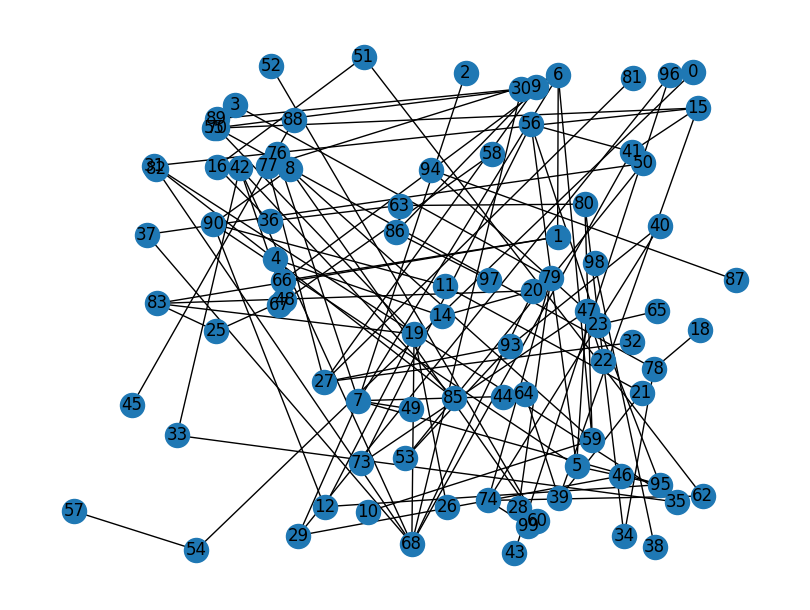

In [6]:
# Create the graph
G = nx.Graph()
# Add the edges to the graph
G.add_edges_from(edge_list)

# Show the graph
pos = nx.random_layout(G)
nx.draw(G, pos=pos, with_labels=True)